ODI WORLD CUP 2023 ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Loading data Sets

In [3]:
batting = pd.read_csv(r"C:\Users\intex\Desktop\Data sets\world cup 2023\batting_summary.csv")
bowling = pd.read_csv(r"C:\Users\intex\Desktop\Data sets\world cup 2023\bowling_summary.csv")
matches = pd.read_csv(r"C:\Users\intex\Desktop\Data sets\world cup 2023\match_schedule_results.csv")
players = pd.read_csv(r"C:\Users\intex\Desktop\Data sets\world cup 2023\world_cup_players_info.csv")


BATTING DATA ANALYSIS

In [4]:
batting.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700


In [5]:
batting.tail()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
911,48,India vs Australia,Australia,Travis Head,2,c Shubman Gill b Mohammed Siraj,137,120,15,4,114.167
912,48,India vs Australia,Australia,Mitchell Marsh,3,c KL Rahul b Jasprit Bumrah,15,15,1,1,100.000
913,48,India vs Australia,Australia,Steve Smith,4,lbw b Jasprit Bumrah,4,9,1,0,44.444
914,48,India vs Australia,Australia,Marnus Labuschagne,5,not out,58,110,4,0,52.727
915,48,India vs Australia,Australia,Glenn Maxwell,6,not out,2,1,0,0,200.000


In [6]:
# to check the shape of data
batting.shape

(916, 11)

In [7]:
# to check the basic information about data type in our data set
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Match_no          916 non-null    int64 
 1   Match_Between     916 non-null    object
 2   Team_Innings      916 non-null    object
 3   Batsman_Name      916 non-null    object
 4   Batting_Position  916 non-null    int64 
 5   Dismissal         914 non-null    object
 6   Runs              916 non-null    int64 
 7   Balls             916 non-null    int64 
 8   4s                916 non-null    int64 
 9   6s                916 non-null    int64 
 10  Strike_Rate       916 non-null    object
dtypes: int64(6), object(5)
memory usage: 78.8+ KB


In [8]:
# to count the null values in our data set
batting.isnull().sum()

Match_no            0
Match_Between       0
Team_Innings        0
Batsman_Name        0
Batting_Position    0
Dismissal           2
Runs                0
Balls               0
4s                  0
6s                  0
Strike_Rate         0
dtype: int64

In [9]:
batting.duplicated().sum()

0

In [10]:
# Stastical information
batting.describe()

,Match_no,Batting_Position,Runs,Balls,4s,6s
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,24.669214,5.398472,26.510917,29.021834,2.533843,0.727074
std,14.042355,3.035952,30.788666,28.493381,3.119120,1.482049
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,5.000000,8.000000,0.000000,0.000000
50%,25.000000,5.000000,15.000000,19.000000,1.000000,0.000000
75%,37.000000,8.000000,38.000000,40.250000,4.000000,1.000000
max,48.000000,11.000000,201.000000,143.000000,21.000000,11.000000


Visualizing the Batting Summary

a) Most runs scored in the tournament

In [11]:
most_runs = batting.groupby('Batsman_Name')['Runs'].sum().sort_values(ascending=False).reset_index().head(10)

In [12]:
most_runs

,Batsman_Name,Runs
0,Virat Kohli,765
1,Quinton de Kock,706
2,Rohit Sharma,597
3,Rachin Ravindra,578
4,David Warner,577
5,Daryl Mitchell,552
6,Shreyas Iyer,530
7,Rassie van der Dussen,480
8,David Miller,474
9,Aiden Markram,472


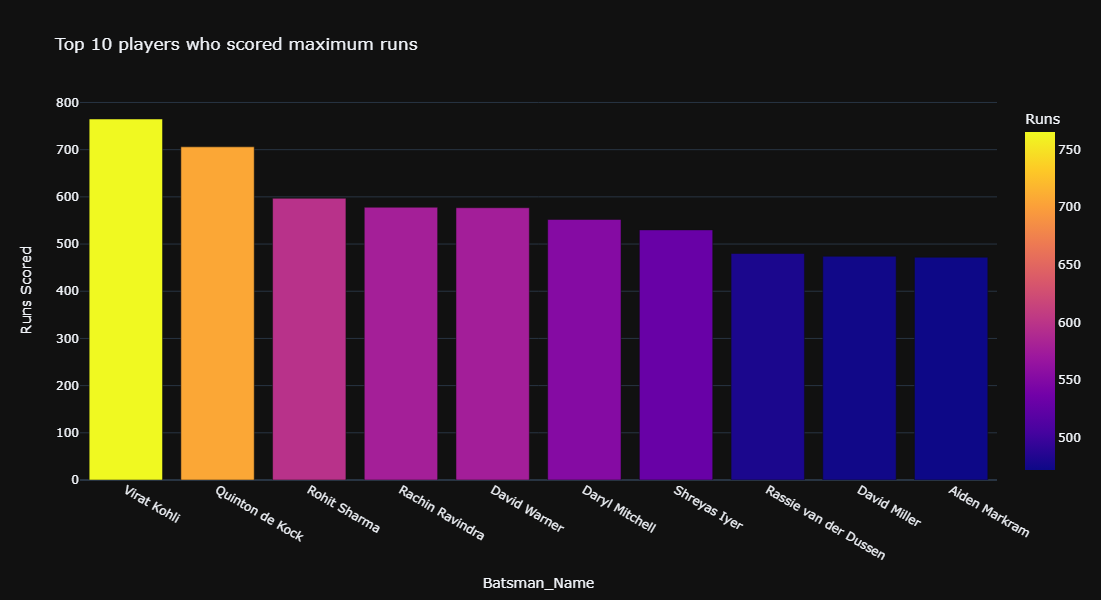

In [61]:
fig= px.bar(most_runs, x="Batsman_Name", y="Runs", title="Top 10 players who scored maximum runs ", color='Runs',template='plotly_dark')
fig.update_layout(yaxis_title='Runs Scored', height=600, width=1000)
fig.show()

Most 4s scored

In [14]:
fours = batting.groupby('Batsman_Name')['4s'].sum().sort_values(ascending=False).reset_index().head(10)


In [15]:
fours

,Batsman_Name,4s
0,Virat Kohli,68
1,Rohit Sharma,66
2,Quinton de Kock,65
3,Rachin Ravindra,55
4,Devon Conway,54
5,David Warner,53
6,Aiden Markram,53
7,Dawid Malan,50
8,Daryl Mitchell,48
9,Travis Head,46


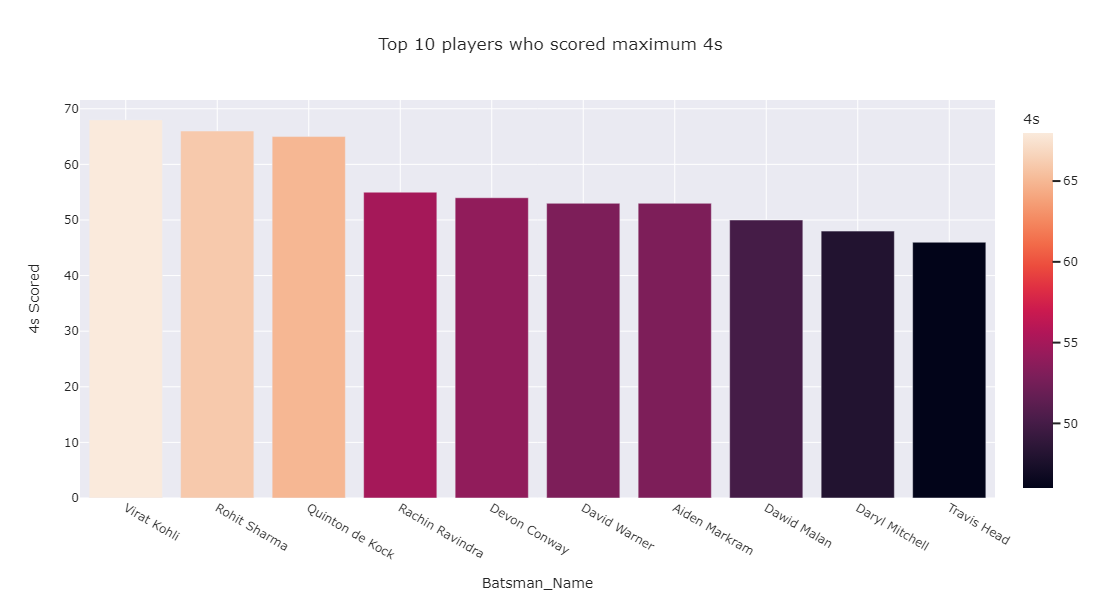

In [63]:
fig= px.bar(fours, x="Batsman_Name", y="4s", title="Top 10 players who scored maximum 4s ", color='4s', template='seaborn')
fig.update_layout(yaxis_title='4s Scored', height=600, width=1000)
fig.show()

In [17]:
sixes = batting.groupby('Batsman_Name')['6s'].sum().sort_values(ascending=False).reset_index().head(10)
sixes

,Batsman_Name,6s
0,Rohit Sharma,31
1,David Warner,28
2,Quinton de Kock,26
3,David Miller,26
4,Shreyas Iyer,24
5,Daryl Mitchell,22
6,Glenn Maxwell,22
7,Heinrich Klaasen,21
8,Mitchell Marsh,21
9,Fakhar Zaman,18


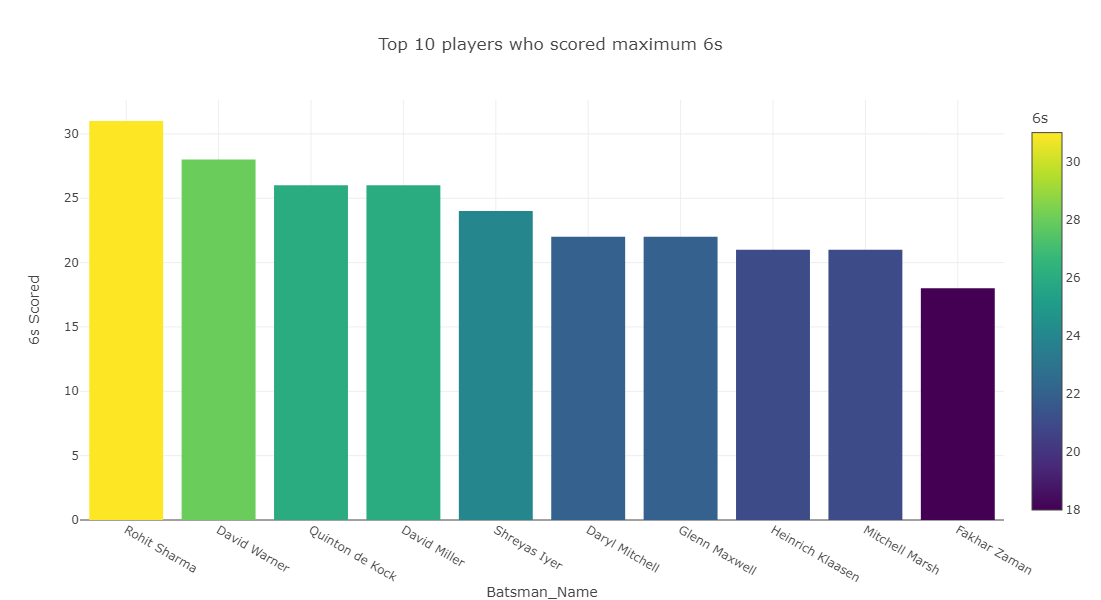

In [38]:
fig= px.bar(sixes, x="Batsman_Name", y="6s", title="Top 10 players who scored maximum 6s ", color='6s', template='gridon')
fig.update_layout(yaxis_title='6s Scored', height=600, width=1000)
fig.show()

In [19]:
batting["total_boundaries"]=batting["4s"]+batting["6s"]

In [20]:
batting.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,total_boundaries
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,5
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300,2
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500,5
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300,5
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700,1


In [21]:
boundaries=batting.groupby('Batsman_Name')['total_boundaries'].sum().sort_values(ascending=False).reset_index().head(10)

In [22]:
boundaries

,Batsman_Name,total_boundaries
0,Rohit Sharma,97
1,Quinton de Kock,91
2,David Warner,81
3,Virat Kohli,77
4,Rachin Ravindra,72
5,Daryl Mitchell,70
6,Mitchell Marsh,64
7,Aiden Markram,63
8,Glenn Maxwell,62
9,Shreyas Iyer,61


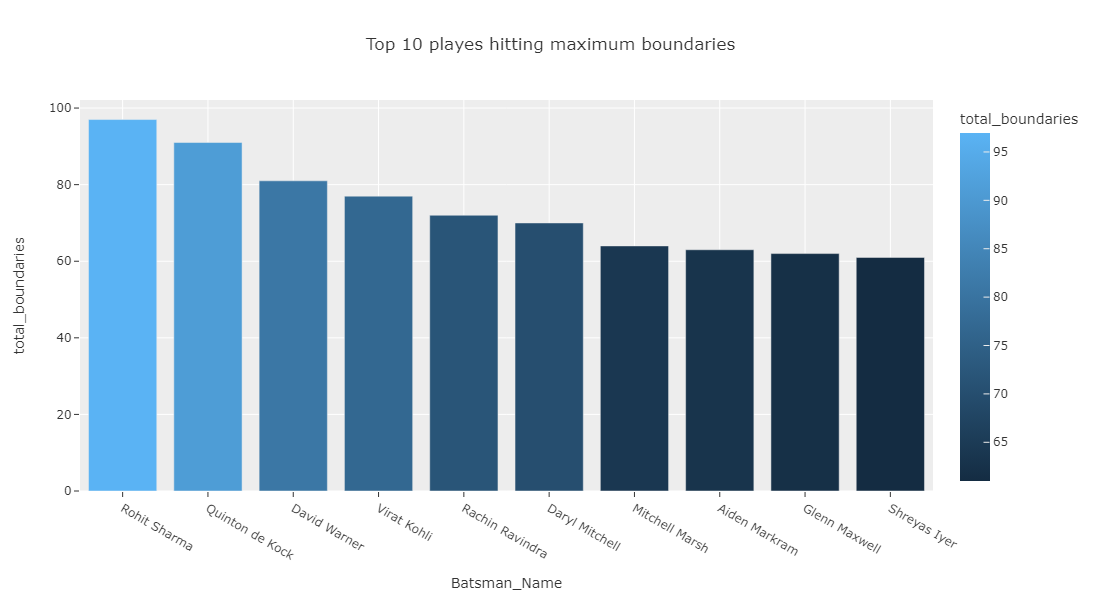

In [39]:
fig=px.bar(boundaries, x='Batsman_Name', y='total_boundaries', title='Top 10 playes hitting maximum boundaries', height=600, width=1000, color='total_boundaries', template='ggplot2')
fig.show()

In [24]:
batting.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,total_boundaries
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,5
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300,2
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500,5
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300,5
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700,1


In [25]:
bps = batting.groupby('Batting_Position')['Runs'].sum().sort_values(ascending=False).reset_index()
bps

,Batting_Position,Runs
0,3,4079
1,4,4048
2,1,3684
3,2,3407
4,5,2694
5,6,2322
6,7,1674
7,8,916
8,9,787
9,10,476


Maximum runs scored was by the batsman at 3rd position followed by 4th and 1st 

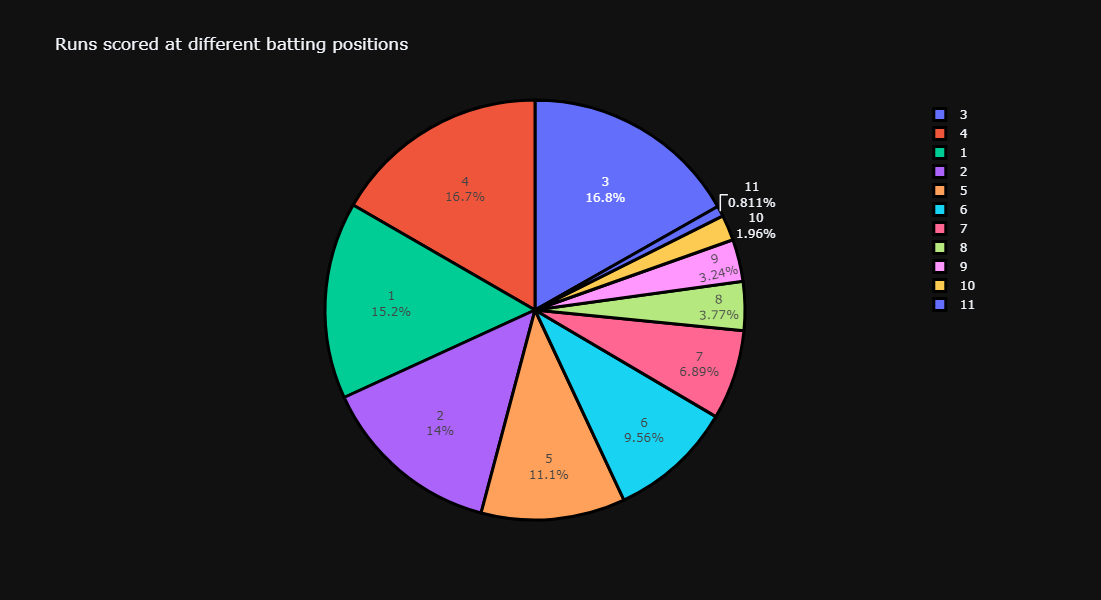

In [69]:

label=bps['Batting_Position']
counts=bps['Runs']
fig=px.pie(bps,names='Batting_Position', values=counts,title='Runs scored at different batting positions',color='Batting_Position',template='plotly_dark')
fig.update_layout(width=1000, height=600)
fig.update_traces(hoverinfo='label',textinfo = 'percent+label',marker=dict(line=dict(color='black', width=3)))
fig.show()

BOWLING DATA ANALYSIS

In [40]:
bowling.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


In [41]:
bowling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Match_no       574 non-null    int64  
 1   Match_Between  574 non-null    object 
 2   Bowling_Team   574 non-null    object 
 3   Bowler_Name    574 non-null    object 
 4   Overs          574 non-null    float64
 5   Maidens        574 non-null    int64  
 6   Runs           574 non-null    int64  
 7   Wickets        574 non-null    int64  
 8   Economy        574 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 40.5+ KB


In [47]:
# Since all columns have 574 non-null values, no need to check for the null values separately

In [46]:
bowling.shape

(574, 9)

In [43]:
bowling.duplicated().sum()

0

In [44]:
bowling.describe()

,Match_no,Overs,Maidens,Runs,Wickets,Economy
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,24.376307,7.351045,0.256098,42.322300,1.202091,5.924564
std,13.956222,2.685601,0.533933,19.651473,1.193757,2.135988
min,1.000000,0.300000,0.000000,1.000000,0.000000,1.355000
25%,12.000000,6.000000,0.000000,30.000000,0.000000,4.500000
50%,24.000000,8.000000,0.000000,41.000000,1.000000,5.670000
75%,36.000000,10.000000,0.000000,55.000000,2.000000,7.075000
max,48.000000,10.000000,3.000000,115.000000,7.000000,16.000000


Visualizing Bowling data

1) Most wickets 

In [53]:
wickets= bowling.groupby('Bowler_Name')['Wickets'].sum().sort_values(ascending=False).reset_index().head(10)
wickets

,Bowler_Name,Wickets
0,Mohammed Shami,24
1,Adam Zampa,23
2,Dilshan Madushanka,21
3,Jasprit Bumrah,20
4,Gerald Coetzee,20
5,Shaheen Afridi,18
6,Marco Jansen,17
7,Josh Hazlewood,16
8,Mitchell Starc,16
9,Haris Rauf,16


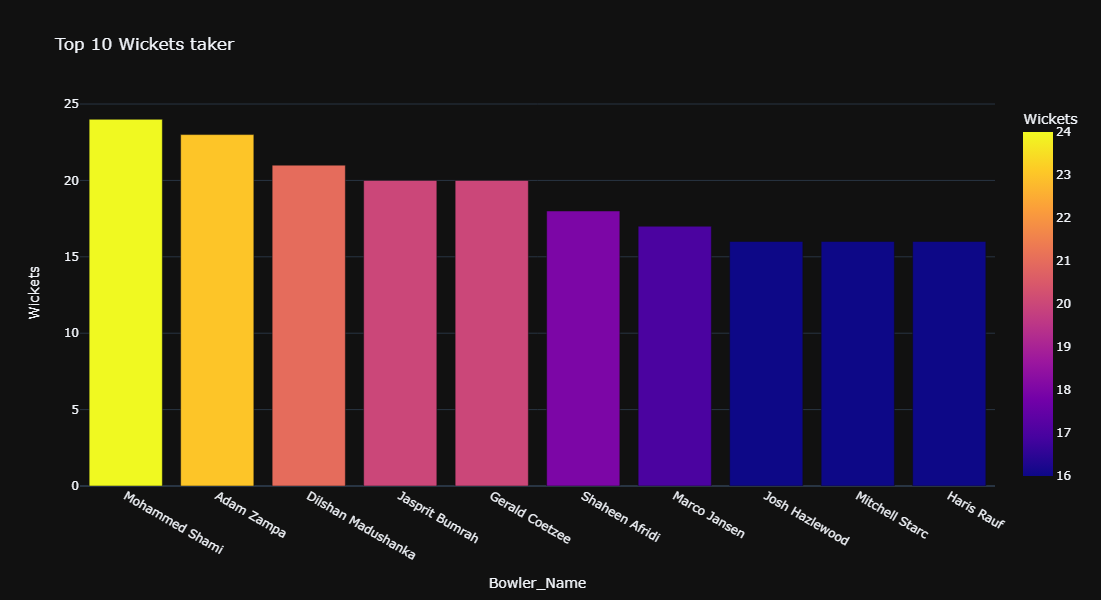

In [67]:
fig=px.bar(wickets,x='Bowler_Name', y='Wickets', title='Top 10 Wickets taker ', width=1000, height=600, color='Wickets',template='plotly_dark')
fig.show()

2) Most Maidens

In [66]:
maidens=bowling.groupby('Bowler_Name')['Maidens'].sum().sort_values(ascending=False).reset_index().head(10)
maidens

,Bowler_Name,Maidens
0,Jasprit Bumrah,9
1,Josh Hazlewood,8
2,Kagiso Rabada,7
3,Mohammed Siraj,6
4,Lungi Ngidi,6
5,David Willey,6
6,Aryan Dutt,6
7,Trent Boult,6
8,Mohammed Shami,4
9,Mohammad Nabi,4


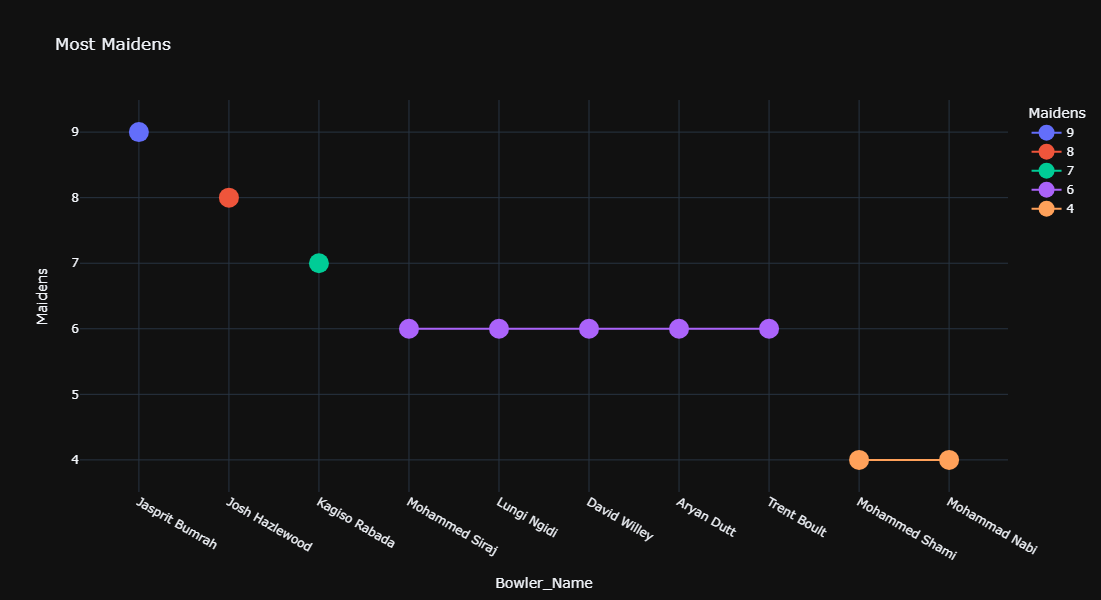

In [88]:
fig=px.line(maidens, x='Bowler_Name', y='Maidens', title='Most Maidens', markers=True, color='Maidens',labels={'Bowler_Name':'Bowler_Name','maidens':'Maidens'},width=1000, height=600)
fig.update_layout(template='plotly_dark')
fig.update_traces(marker=dict(size=20))
fig.show()

In [89]:
bowling.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


3) Most Runs Conceded

In [129]:
runs_given=bowling.groupby('Bowler_Name')[['Runs','Overs','Economy']].sum().sort_values(by='Runs',ascending=False).reset_index().head(10)
runs_given.head(10)

,Bowler_Name,Runs,Overs,Economy
0,Haris Rauf,533,79.0,60.945
1,Mitchell Starc,528,87.0,60.858
2,Dilshan Madushanka,525,77.8,61.111
3,Adam Zampa,515,96.0,58.224
4,Pat Cummins,515,88.9,62.494
5,Trent Boult,504,91.0,55.354
6,Bas de Leede,487,67.0,58.128
7,Shaheen Afridi,481,81.0,53.075
8,Logan van Beek,476,70.5,52.011
9,Mohammed Siraj,469,82.3,59.655


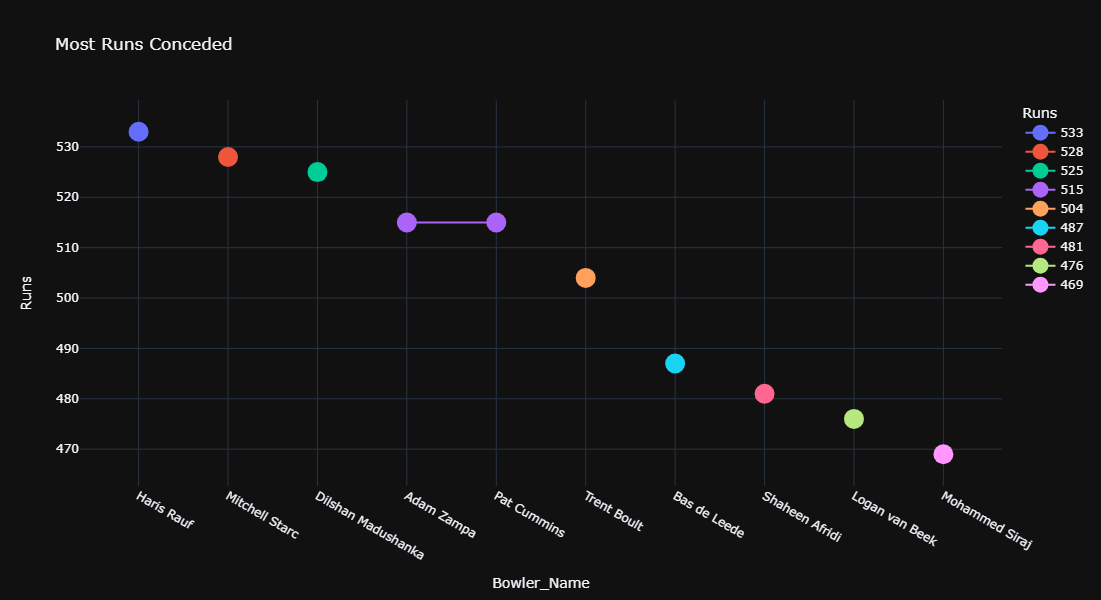

In [130]:

fig=px.line(runs_given, x='Bowler_Name', y='Runs',title='Most Runs Conceded', markers=True, template='plotly_dark', color="Runs", line_shape='linear')
fig.update_layout(width=1000, height=600)
fig.update_traces(marker=dict(size=20))

fig.show()












PLAYERS DATA ANALYSIS

In [131]:
players.head()

,player_name,team_name,image_of_player,battingStyle,bowlingStyle,playingRole,description
0,Jonny Bairstow,England,,Right-hand bat,Right-arm fast-medium,Wicketkeeper Batter,Jonny Bairstow is an English cricketer known f...
1,Joe Root,England,,Right hand Bat,Right arm Offbreak,Top order Batter,Joe Root is an English cricketer known for his...
2,Jos Buttler,England,,Right hand Bat,,Wicketkeeper Batter,Jos Buttler is an English cricketer known for ...
3,Will Young,New Zealand,,Right hand Bat,Right arm Offbreak,Top order Batter,Will Young is a New Zealand cricketer known fo...
4,Rachin Ravindra,New Zealand,,Left hand Bat,Slow Left arm Orthodox,Top order Batter,Rachin Ravindra is a New Zealand cricketer kno...


In [132]:
players.size

1057

In [133]:
players.shape

(151, 7)

In [134]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_name      151 non-null    object
 1   team_name        151 non-null    object
 2   image_of_player  85 non-null     object
 3   battingStyle     151 non-null    object
 4   bowlingStyle     145 non-null    object
 5   playingRole      151 non-null    object
 6   description      134 non-null    object
dtypes: object(7)
memory usage: 8.4+ KB


In [136]:
players.isnull().sum()

player_name         0
team_name           0
image_of_player    66
battingStyle        0
bowlingStyle        6
playingRole         0
description        17
dtype: int64

In [138]:
players.duplicated().sum()

0

In [140]:
players.columns

Index(['player_name', 'team_name', 'image_of_player', 'battingStyle',
       'bowlingStyle', 'playingRole', 'description'],
      dtype='object')

To count the number of players from each team

1) Total Players from Each Country

In [144]:
player_count=pd.DataFrame(players['team_name'].value_counts().reset_index())
player_count

,team_name,count
0,New Zealand,15
1,Pakistan,15
2,Bangladesh,15
3,South Africa,15
4,Australia,15
5,India,15
6,England,14
7,Sri Lanka,14
8,Afghanistan,13
9,,12


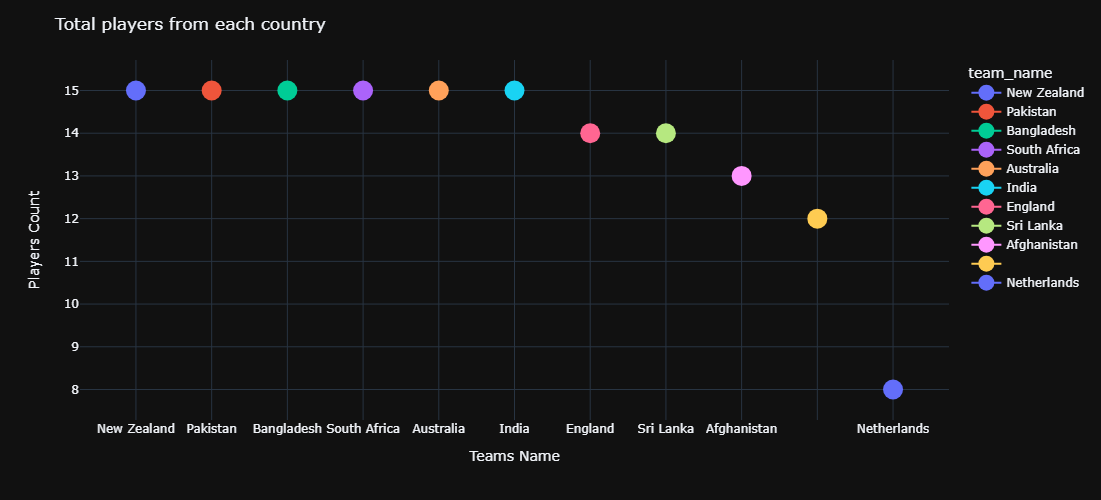

In [157]:
fig=px.line(player_count, x='team_name', y='count', labels={'team_name':'team_name', 'count':'count'}, color='team_name', markers=True, line_shape='linear')
fig.update_layout(template='plotly_dark', xaxis_title='Teams Name', yaxis_title='Players Count',title='Total players from each country', width=1000, height=500)
fig.update_traces(marker=dict(size=20))
fig.show()

2. Batting Style

In [158]:
bat_style=pd.DataFrame(players['battingStyle'].value_counts().reset_index())
bat_style

,battingStyle,count
0,Right hand Bat,101
1,Left hand Bat,49
2,Right-hand bat,1


In [162]:
bat_style=bat_style[bat_style['battingStyle']!='Right-hand bat']
bat_style

,battingStyle,count
0,Right hand Bat,101
1,Left hand Bat,49


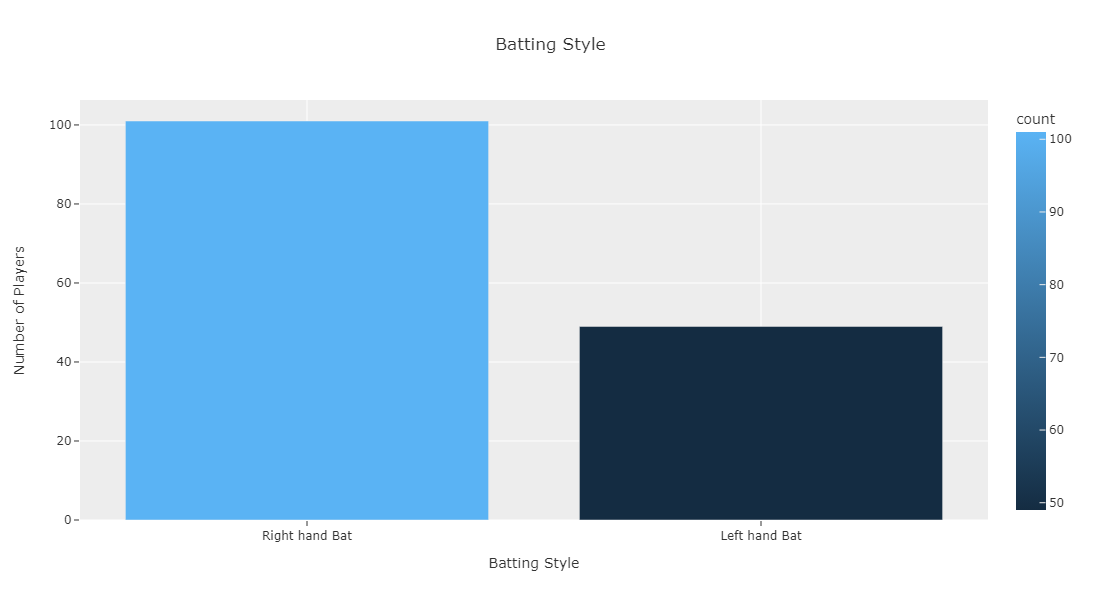

In [179]:
fig=px.bar(bat_style, x='battingStyle', y='count', title='Batting Style', color='count', template='ggplot2')
fig.update_layout(xaxis_title='Batting Style', yaxis_title='Number of Players', width=600, height=600)
fig.show()

In [180]:
players.columns

Index(['player_name', 'team_name', 'image_of_player', 'battingStyle',
       'bowlingStyle', 'playingRole', 'description'],
      dtype='object')

3. Bowling Style

In [182]:
bowl_style= pd.DataFrame(players['bowlingStyle'].value_counts().reset_index())
bowl_style

,bowlingStyle,count
0,Right arm Offbreak,34
1,Right arm Fast medium,18
2,,16
3,Right arm Medium fast,15
4,Right arm Fast,13
5,Right arm Medium,9
6,Slow Left arm Orthodox,8
7,Legbreak,7
8,Left arm Medium fast,5
9,Left arm Fast medium,5


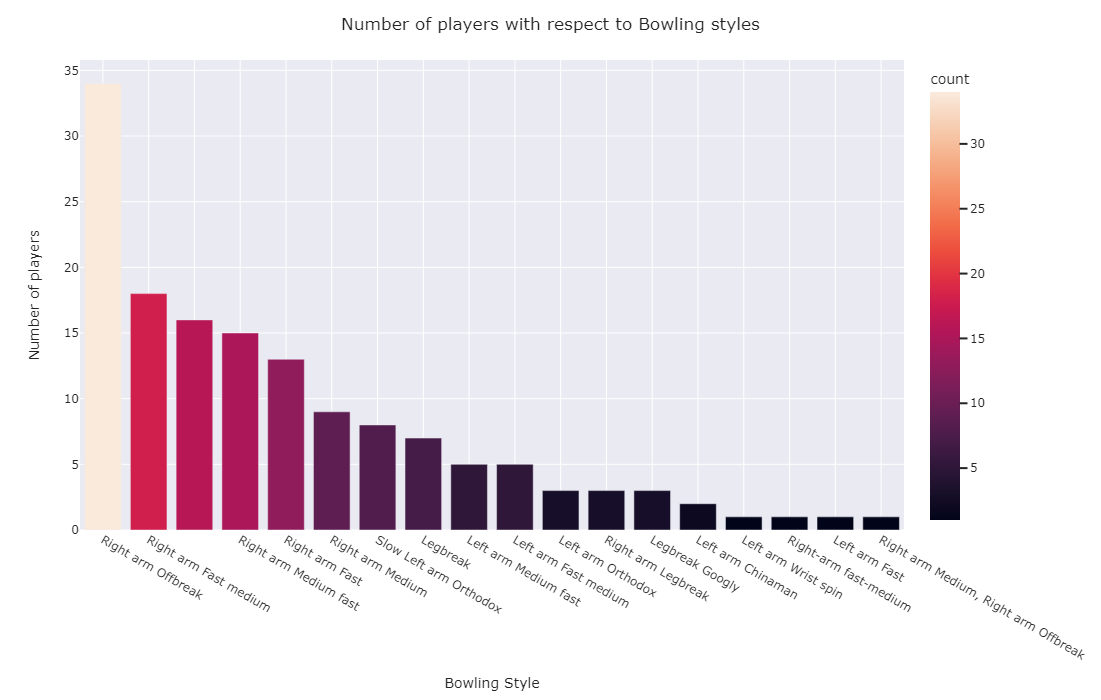

In [192]:
fig=px.bar(bowl_style, x='bowlingStyle',y='count',template='seaborn', color='count')
fig.update_layout(title='Number of players with respect to Bowling styles',xaxis_title='Bowling Style', yaxis_title='Number of players', width =1200, height=700)

fig.show()

In [193]:
players.head()

,player_name,team_name,image_of_player,battingStyle,bowlingStyle,playingRole,description
0,Jonny Bairstow,England,,Right-hand bat,Right-arm fast-medium,Wicketkeeper Batter,Jonny Bairstow is an English cricketer known f...
1,Joe Root,England,,Right hand Bat,Right arm Offbreak,Top order Batter,Joe Root is an English cricketer known for his...
2,Jos Buttler,England,,Right hand Bat,,Wicketkeeper Batter,Jos Buttler is an English cricketer known for ...
3,Will Young,New Zealand,,Right hand Bat,Right arm Offbreak,Top order Batter,Will Young is a New Zealand cricketer known fo...
4,Rachin Ravindra,New Zealand,,Left hand Bat,Slow Left arm Orthodox,Top order Batter,Rachin Ravindra is a New Zealand cricketer kno...


4. Playing style

In [194]:
role=pd.DataFrame(players['playingRole'].value_counts().reset_index())
role

,playingRole,count
0,Bowler,46
1,Top order Batter,28
2,Allrounder,22
3,Wicketkeeper Batter,15
4,,10
5,Middle order Batter,9
6,Batting Allrounder,8
7,Opening Batter,7
8,Bowling Allrounder,4
9,Batter,2


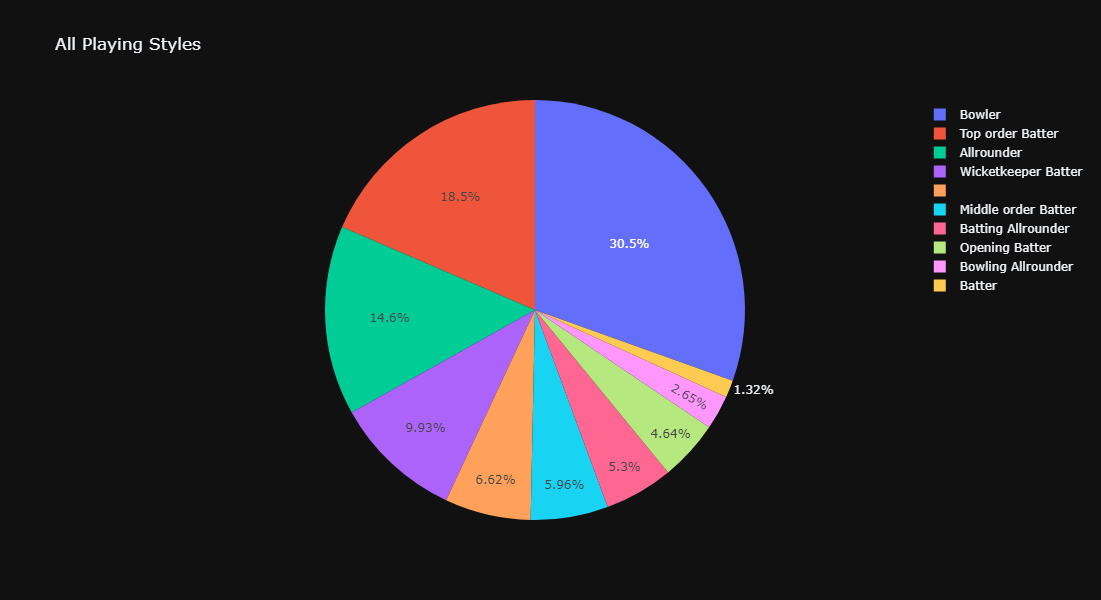

In [205]:
fig=px.pie(role, names='playingRole', values='count',title='All Playing Styles',color='count',labels={'battingStyle':'playingRole','count':'Count'})
fig.update_layout(width=1000, height=600, template='plotly_dark')
fig.show()

MATCH SCHEDULE RESULTS DATASET ANALYSIS

In [207]:
matches.head()

,Match_no,Date,Venue,Team1,Team2,Winner,Scorecard URL
0,1,October 5,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,October 6,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,October 7,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,October 7,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,October 8,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


In [208]:
matches.shape

(48, 7)

In [210]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Match_no       48 non-null     int64 
 1   Date           48 non-null     object
 2   Venue          48 non-null     object
 3   Team1          48 non-null     object
 4   Team2          48 non-null     object
 5   Winner         48 non-null     object
 6   Scorecard URL  48 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


In [212]:
matches.isnull().sum()

Match_no         0
Date             0
Venue            0
Team1            0
Team2            0
Winner           0
Scorecard URL    0
dtype: int64

In [213]:
matches.duplicated().sum()

0

In [214]:
matches.describe()

,Match_no
count,48.00
mean,24.50
std,14.00
min,1.00
25%,12.75
50%,24.50
75%,36.25
max,48.00


Visualizations

1.Number of wins by each team

In [216]:
matches.columns

Index(['Match_no', 'Date', 'Venue', 'Team1', 'Team2', 'Winner',
       'Scorecard URL'],
      dtype='object')

In [217]:
winner=pd.DataFrame(matches['Winner'].value_counts().reset_index())
winner

,Winner,count
0,India,9
1,Australia,9
2,South Africa,7
3,New Zealand,5
4,Pakistan,4
5,Afghanistan,4
6,England,3
7,Sri Lanka,3
8,Bangladesh,2
9,Netherlands,2


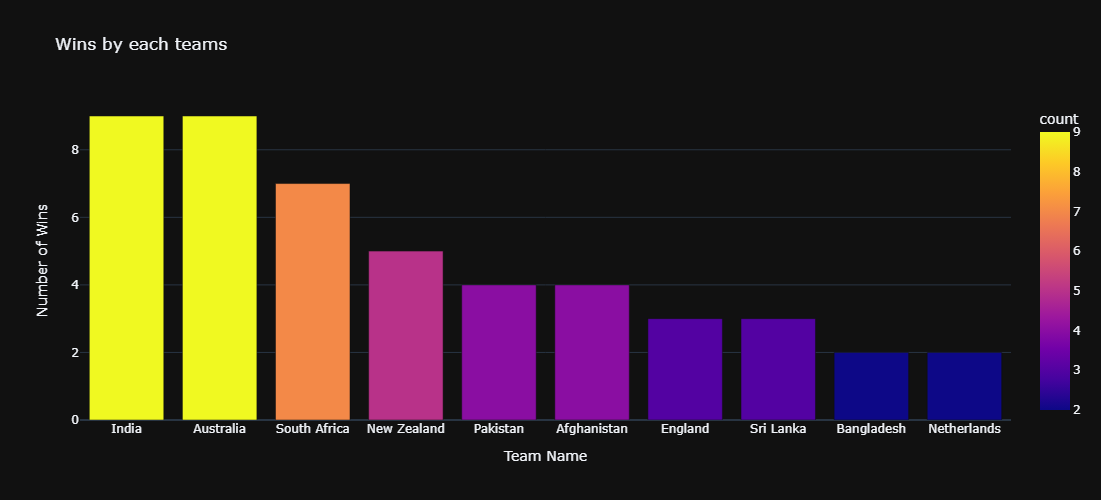

In [222]:
fig=px.bar(winner, x='Winner', y='count', title='Wins by each teams', color='count', template='plotly_dark')
fig.update_layout(xaxis_title='Team Name', yaxis_title='Number of Wins', height=500)
fig.show()

In [241]:
from wordcloud import WordCloud


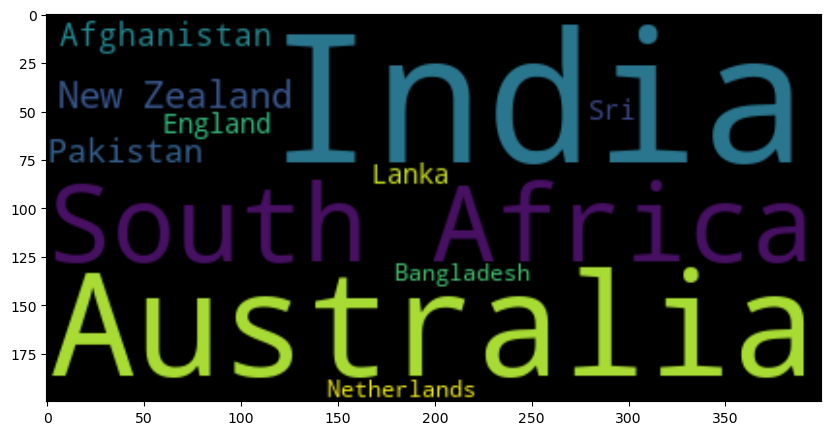

In [247]:
text_data=' '.join(matches['Winner'])
wordcloud=WordCloud(contour_color='red', background_color='black').generate(text_data)
plt.figure(figsize=(10,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis()
plt.show()

2. Match Venue

In [223]:
venue=pd.DataFrame(matches['Venue'].value_counts().reset_index())
venue

,Venue,count
0,Ahmedabad,5
1,Delhi,5
2,Chennai,5
3,Ekana Cricket Stadium Lucknow,5
4,Pune,5
5,Bengaluru,5
6,Mumbai,5
7,Kolkata,5
8,Dharamsala,4
9,Hyderabad,3


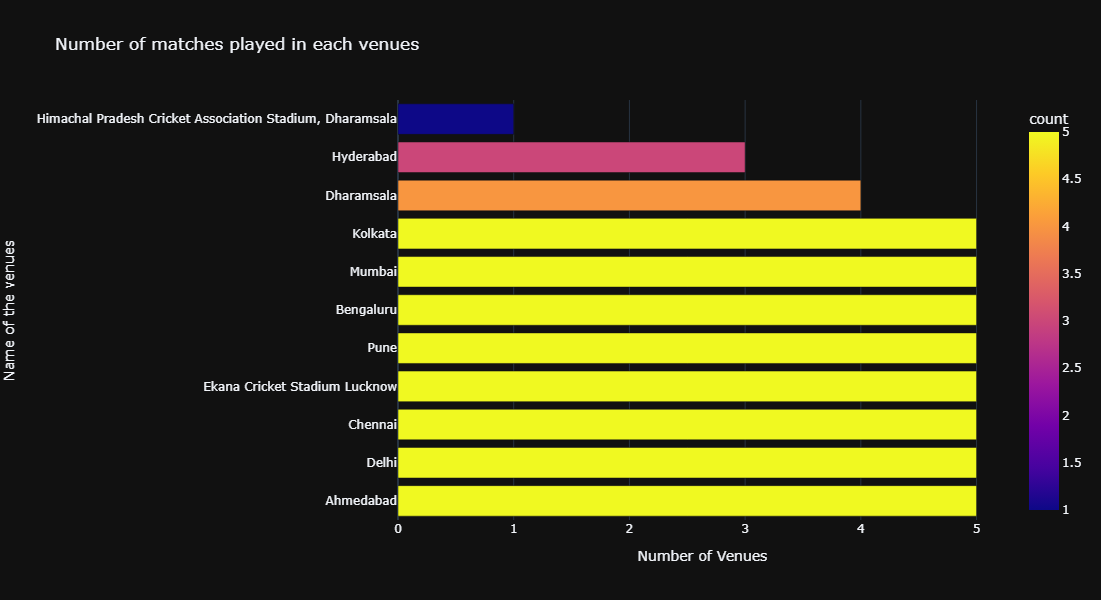

In [236]:
fig=px.bar(venue, x='count', y='Venue', color='count', title='Number of matches played in each venues',orientation='h')
fig.update_layout(width=1000, height=600, yaxis_title='Name of the venues', xaxis_title='Number of Venues', template='plotly_dark')
fig.show()